*Member 1*

Name: Omar Aref 

ID: 46-5432

*Member 2*

Name: Hana Adel

ID: 46-0377

*Member 3*

Name: Sarah Halla

ID: 46-0431

*Member 4*

Name: Farida El Genedi  

ID: 46-2291

*Member 5*

Name: Shawky Haitham  

ID: 46-3502

# Milestone 1 - EDA and Preprocessing data 

- Load dataset
- Explore the dataset and ask atleast 5 questions to give you a better understanding of the data provided to you. 
- Visualise the answer to these 5 questions.
- Cleaing the data
- Observe missing data and comment on why you believe it is missing(MCAR,MAR or MNAR) 
- Observe duplicate data
- Observe outliers
- After observing outliers,missing data and duplicates, handle any unclean data.
- With every change you are making to the data you need to comment on why you used this technique and how has it affected the data(by both showing the change in the data i.e change in number of rows/columns,change in distrubution, etc and commenting on it).
- Data transformation and feature engineering
- Add a new column named 'Week number' and discretisize the data into weeks according to the dates.Tip: Change the datatype of the date feature to datetime type instead of object.
- Encode any categorical feature(s) and comment on why you used this technique and how the data has changed.
- Identify feature(s) which need normalisation and show your reasoning.Then choose a technique to normalise the feature(s) and comment on why you chose this technique.
- Add atleast two more columns which adds more info to the dataset by evaluating specific feature(s). I.E( Column indicating whether the accident was on a weekend or not). 
- For any imputation with arbitrary values or encoding done, you have to store what the value imputed or encoded represents in a new csv file. I.e if you impute a missing value with -1 or 100 you must have a csv file illustrating what -1 and 100 means. Or for instance, if you encode cities with 1,2,3,4,etc what each number represents must be shown in the new csv file.
- Load the new dataset into a csv file.
- **Extremely Important note** - Your code should be as generic as possible and not hard-coded and be able to work with various datasets. Any hard-coded solutions will be severely penalised.
- Bonus: Load the dataset as a parquet file instead of a csv file(Parquet file is a compressed file format).

In [1]:
pip install seaborn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sb
import math

from IPython.display import display

# 1 - Extraction

In [3]:
df  = pd.read_csv("2020_Accidents_UK.csv", low_memory=False);
sb.set(rc={'figure.figsize':(11.7,8.27)})

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91199 entries, 0 to 91198
Data columns (total 36 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   accident_index                               91199 non-null  object 
 1   accident_year                                91199 non-null  int64  
 2   accident_reference                           91199 non-null  object 
 3   location_easting_osgr                        91185 non-null  float64
 4   location_northing_osgr                       91185 non-null  float64
 5   longitude                                    91185 non-null  float64
 6   latitude                                     91185 non-null  float64
 7   police_force                                 91199 non-null  object 
 8   accident_severity                            91199 non-null  object 
 9   number_of_vehicles                           91199 non-null  int64  
 10

In [5]:
df.head()

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2020010219808,2020,010219808,521389.0,175144.0,-0.254001,51.462262,Metropolitan Police,Slight,1,...,unknown (self reported),Daylight,NaN,unknown (self reported),None,None,Urban,No - accident was reported using a self comple...,Non-trunk,E01004576
1,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,Metropolitan Police,Slight,1,...,"Pelican, puffin, toucan or similar non-junctio...",Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01003034
2,2020010228005,2020,010228005,526432.0,182761.0,-0.178719,51.529614,Metropolitan Police,Slight,1,...,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01004726
3,2020010228006,2020,010228006,538676.0,184371.0,-0.001683,51.541210,Metropolitan Police,Serious,1,...,"Pelican, puffin, toucan or similar non-junctio...",Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01003617
4,2020010228011,2020,010228011,529324.0,181286.0,-0.137592,51.515704,Metropolitan Police,Slight,1,...,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01004763


# 2- EDA

### Question 1: What are the most frequent locations (clusters) that have accidents ? - We will use the latitude and longitude data found in the dataset provided -


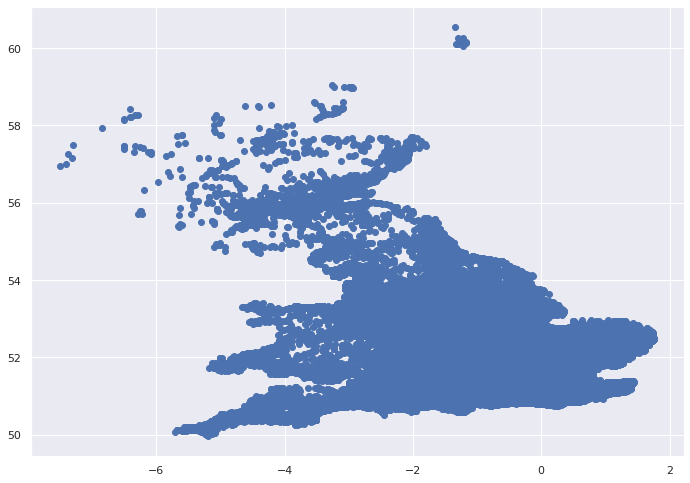

In [6]:
plt.plot(df['longitude'], df['latitude'], 'o', );


We can see that there are many points in the data, so we will need to plot every 150th point to deteremine any pattern in the data.

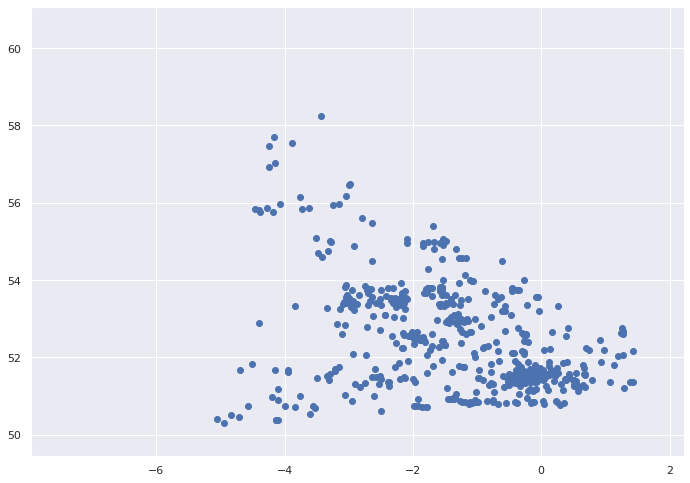

In [7]:
plt.plot(df['longitude'], df['latitude'], 'o', ms=6, markevery=150);


We can now see the resemblance between the figure and the map of the UK. It is clear from the clusters in the figure that areas with higher population count like London in the lower right corner, Manchester in the middle towards the left, and Liverpool above Manchester on the left have higher number of accidents.

### Question 2: does the day of the week affect the number of accidents ? and does the time of the day have an effect on the number of accidents ? 

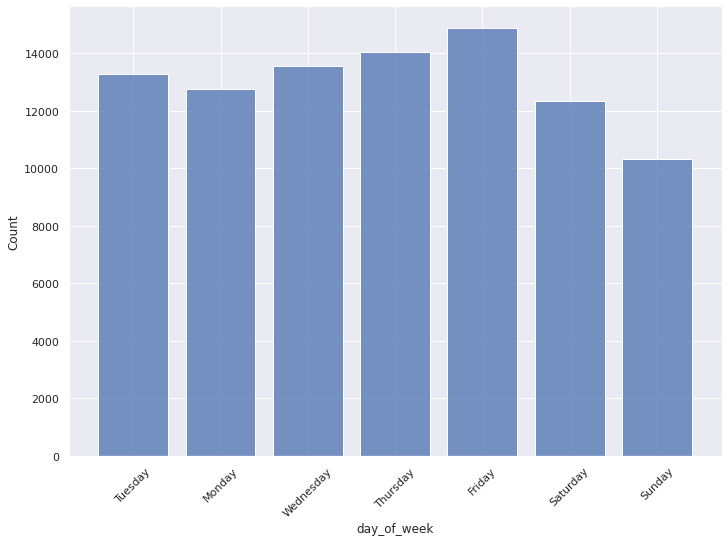

In [8]:
sb.histplot(df['day_of_week'], shrink=.8)
plt.xticks(rotation=45);
# plt.hist(df['day_of_week'])

**Number of accidents in relation to weekday:**
It is clear from the histogram that the number of the accidents is at a peak on fridays and drops significantly on the weekends and especially on Sundays. Next, we will analyze the time of the day's effect on the number of accidents.

In [9]:
df['time'].head()

0    09:00
1    13:55
2    01:25
3    01:50
4    02:25
Name: time, dtype: object

In [10]:
def get_hour (x:str) :
    return (x.split(':')[0])

df['time_hour']= df['time'].apply(get_hour)


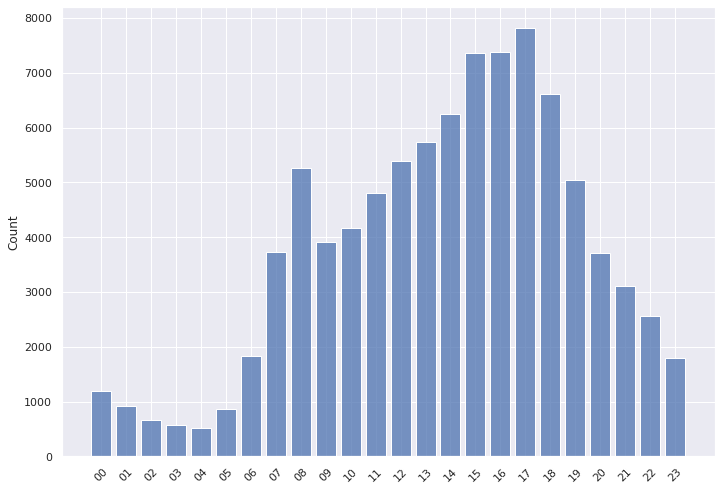

In [11]:
sb.histplot(np.sort(df['time_hour']), shrink=.8,  bins=24)
plt.xticks(rotation=45);

**Number of accidents in relation to time of day:**
From the histogram, it is clear that the most number of accidents happen at 17:00 and 18:00, which can be explained with the rush hour. Morever, the least number of accidents occur from 22:00 till 6:00, we can deduce that this is because people are usually asleep during those times and thus less people are driving resulting in less accidents.

## We will now delve in the multivariate exploration of the data
### Question 3: We will now explore the relationship between the road type and the severity of the accident.

In [12]:
df['road_type'].unique()

array(['Single carriageway', 'One way street', 'Dual carriageway',
       'Slip road', 'Roundabout', nan], dtype=object)

In [13]:
df['accident_severity'].unique()

array(['Slight', 'Serious', 'Fatal'], dtype=object)

In [14]:
df['number_of_casualties'].count()

91199

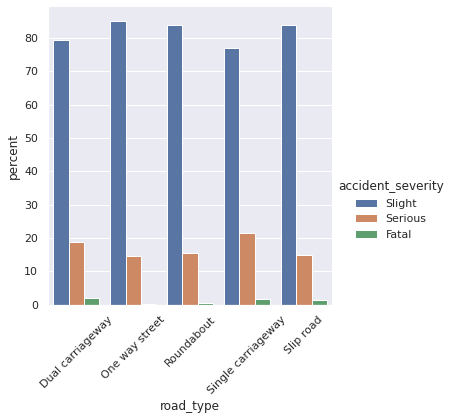

In [15]:
df1 = df.groupby("road_type")["accident_severity"].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
sb.catplot(data=df1, x="road_type", y="percent", hue="accident_severity", kind="bar")
plt.xticks(rotation=45);


**Accident severity in relation to roadtype:**
From the histogram in the above figure, it is clear that more severe accidents happen on the single carriageway as the number of serious and fatal accidents are the highest in the single carriageway roadtype as this road has no separation between the two traffic lanes. Morevover, the least severe accidents occur on the one way street roadtypes as there are almost no fatal accidents and the least serious accidents in this roadtype which is logical.

### Question 4: We will now explore the relationship between the road type and the number of casualities per accident.

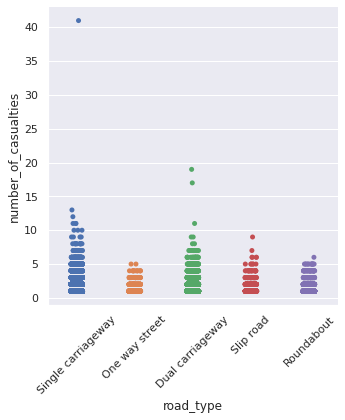

In [16]:
sb.catplot(data=df, x="road_type", y="number_of_casualties")
plt.xticks(rotation=45);


**Number of casualties in relation to road type:**
From the above figure, we can observe that the highest number of casualties per accident is in the single carriageway roadtype (due to the road's nature as explained before). Morever, the least number of casualties per accident are in the one way street roadtype. These observations align with the observations about the road severity in relation to roadtype as well.

### Question 5: We will now explore the relationship between the speed limit and the accident severity.

First we will explore the speed limit distribution in the data using a histogram to visualize it.

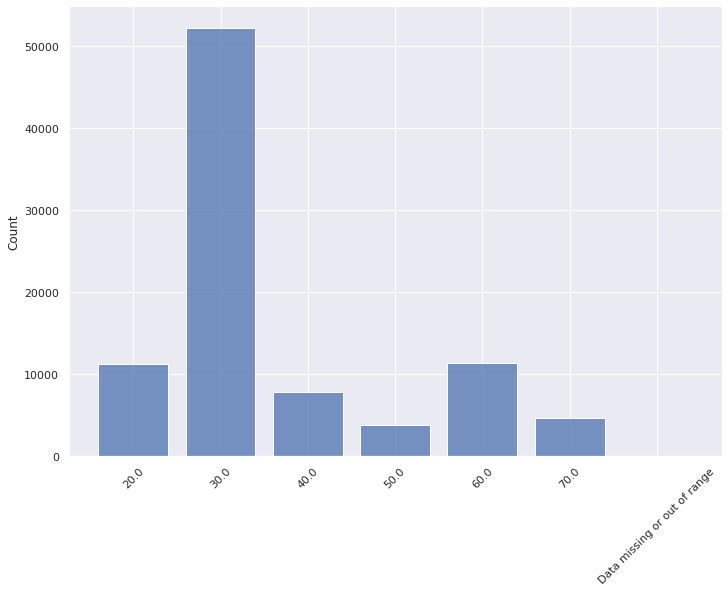

In [17]:
sb.histplot(np.sort(df['speed_limit']), shrink=.8,)
plt.xticks(rotation=45);

In [18]:
df['speed_limit'].value_counts()

30.0                            52260
60.0                            11408
20.0                            11183
40.0                             7867
70.0                             4687
50.0                             3782
Data missing or out of range       12
Name: speed_limit, dtype: int64

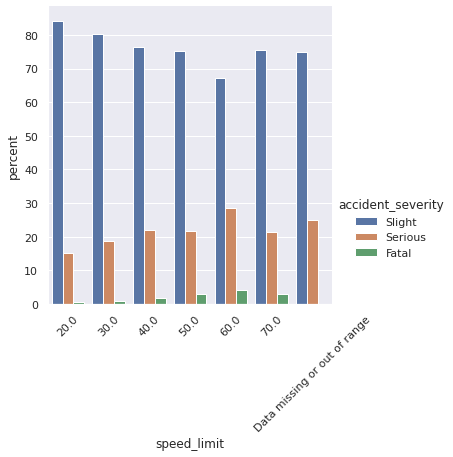

In [19]:
df1 = df.groupby("speed_limit")["accident_severity"].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
sb.catplot(data=df1, x="speed_limit", y="percent", hue="accident_severity", kind="bar")
plt.xticks(rotation=45);

**Accident severity in relation to speed limit:**
From the histogram in the figure above, we can observe a pattern where the accident severity increases as the speed limit increase however accidents are more severe at speed limit 60 than 70. 

Finished EDA

# 3 - Cleaning Data

## Observing Missing and duplicate Data

Observing missing data:

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91185 entries, 0 to 91198
Data columns (total 39 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   accident_index                               91185 non-null  object        
 1   accident_year                                91185 non-null  int64         
 2   accident_reference                           91185 non-null  object        
 3   location_easting_osgr                        91185 non-null  float64       
 4   location_northing_osgr                       91185 non-null  float64       
 5   longitude                                    91185 non-null  float64       
 6   latitude                                     91185 non-null  float64       
 7   police_force                                 91185 non-null  object        
 8   accident_severity                            91185 non-null  object        


The missing location easting ogr and location westing ogr and latitude and longitude are missing completely at random.

In [44]:
df['road_type'].value_counts()


Single carriageway    68431
Dual carriageway      13509
Roundabout             5695
One way street         2018
Slip road              1532
Name: road_type, dtype: int64

In [45]:
road_type_nan = df[df["road_type"].isna()]
road_type_not_nan = df[df["road_type"].notna()]


In [46]:
display(road_type_nan.head())

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,time_hour,month,new_weather_conditions


In [47]:
road_type_not_nan['did_police_officer_attend_scene_of_accident'].value_counts()

Yes                                                                         62435
No                                                                          19631
No - accident was reported using a self completion  form (self rep only)     9118
Data missing or out of range                                                    1
Name: did_police_officer_attend_scene_of_accident, dtype: int64

In [48]:
road_type_nan['did_police_officer_attend_scene_of_accident'].value_counts () 

Series([], Name: did_police_officer_attend_scene_of_accident, dtype: int64)

In [49]:
df['second_road_class'].value_counts()



Not at junction or within 20 metres    37922
Unclassified                           36430
A                                       9563
B                                       3656
C                                       3154
Motorway                                 314
-1                                       110
A(M)                                      36
Name: second_road_class, dtype: int64

In [50]:
second_number_nan = df[df["second_road_number"].isna()]
second_number_not_nan = df[df["second_road_number"].notna()]


In [51]:
second_number_nan['first_road_class'].value_counts()



A               15386
Unclassified    14050
B                4799
Motorway         2058
C                1574
A(M)              172
Name: first_road_class, dtype: int64

In [52]:
second_number_nan.groupby(by=['first_road_class', 'second_road_class'] ).count()['accident_year']

first_road_class  second_road_class                  
A                 -1                                        53
                  A                                          3
                  Not at junction or within 20 metres    15330
A(M)              -1                                         2
                  Not at junction or within 20 metres      170
B                 -1                                         9
                  Not at junction or within 20 metres     4790
C                 -1                                        11
                  Not at junction or within 20 metres     1563
Motorway          Not at junction or within 20 metres     2058
Unclassified      -1                                        35
                  A                                          3
                  B                                          1
                  Not at junction or within 20 metres    14011
Name: accident_year, dtype: int64

In [53]:
second_number_not_nan.groupby(by=['first_road_class', 'second_road_class'] ).count()['second_road_number']


first_road_class  second_road_class
A                 A                     6506
                  A(M)                    16
                  B                     1931
                  C                     1791
                  Motorway               180
                  Unclassified         14791
A(M)              A                       16
                  A(M)                     7
                  B                        7
                  Unclassified             5
B                 A                      600
                  A(M)                     5
                  B                      889
                  C                      391
                  Motorway                11
                  Unclassified          4790
C                 A                      323
                  B                       84
                  C                      753
                  Unclassified          2081
Motorway          A                      160
                  A

The road type values missing are missing at random.

In [54]:
df['weather_conditions'].value_counts()

Fine no high winds              70720
Raining no high winds           11581
Other                            2629
Raining + high winds             1665
Fine + high winds                1400
Fog or mist                       510
Snowing no high winds             185
Snowing + high winds               73
Data missing or out of range        1
Name: weather_conditions, dtype: int64

In [55]:


df['date'] = pd.to_datetime(df['date'], dayfirst=True)


In [56]:
df['month'] =pd.DatetimeIndex(df['date']).month

In [57]:
weathers_nan = df[df["weather_conditions"].isna()]['month'].value_counts().sort_index()
weathers_not_nan = df[df["weather_conditions"].notna()]['month'].value_counts().sort_index()

In [58]:
def normalize(series_index):
    return (series_index-series_index.min())/(series_index.max()-series_index.min())

The weather conditions values are missing completely at random.

## Handling Missing data

In [59]:
df.dropna(subset=["location_easting_osgr","location_northing_osgr" , "longitude" , "latitude"], inplace=True)

The rows with missing location easting osgr, location northing osgr, longitude, or latitude were dropped.

In [60]:
df['road_type'].unique()
df['road_type'].value_counts()
road_type_not_nan = df[ (df["road_type"].notna())]
def get_random_road_type (x) :
    if(not isinstance(x, str)):
        return np.random.choice(road_type_not_nan['road_type'])
    return x
df['road_type'] = df['road_type'].apply(get_random_road_type)

The missing road type values were imputed using the distribution of the available road type values; a random road type was chosen based on the distribution.

In [61]:
def get_mode_weather_conditions (x, mode, month) :
    if(not isinstance(x, str) & x.month== month  ):
        return mode
    return x['weather_conditions']
for i in range(1,12):
    month_mode  = df.query('month == ' +str(i))['weather_conditions'].mode()[0]
    df['new_weather_conditions']=df.apply(lambda row: month_mode if (not isinstance(row['weather_conditions'], str) &row['month']== i ) else row['weather_conditions'], axis=1)

The missing weather conditions values were imputed based on the weather condition mode of the month where the missing value lies.

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91185 entries, 0 to 91198
Data columns (total 39 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   accident_index                               91185 non-null  object        
 1   accident_year                                91185 non-null  int64         
 2   accident_reference                           91185 non-null  object        
 3   location_easting_osgr                        91185 non-null  float64       
 4   location_northing_osgr                       91185 non-null  float64       
 5   longitude                                    91185 non-null  float64       
 6   latitude                                     91185 non-null  float64       
 7   police_force                                 91185 non-null  object        
 8   accident_severity                            91185 non-null  object        


## Filling second road class manuaally

## Findings and conclusions




## Observing outliers

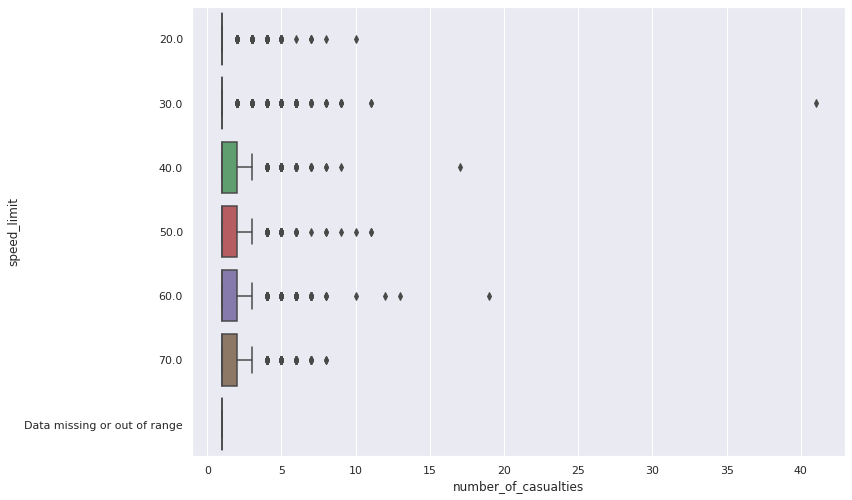

In [63]:
sb.boxplot(x = df['number_of_casualties'], y=df['speed_limit'])


Due to the small range of the number of casualties and the boxplot in the above figure, we can conclude that there are no outliers in the number of casualties column.

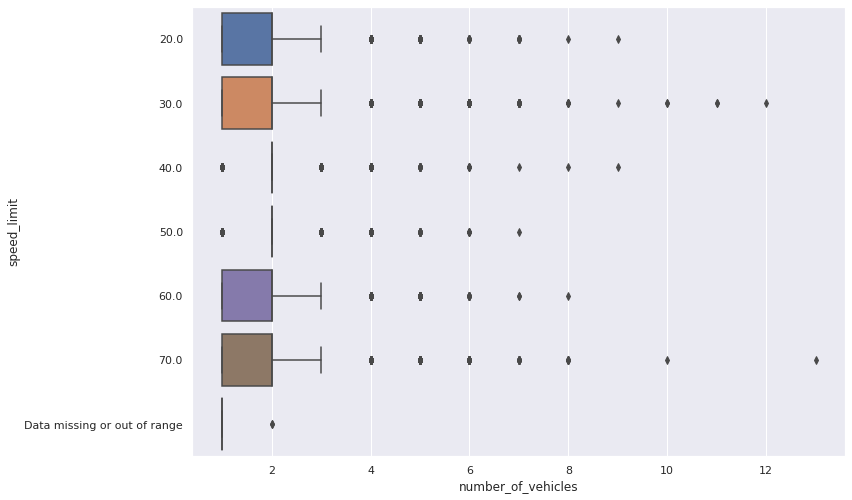

In [64]:
sb.boxplot(x = df['number_of_vehicles'], y=df['speed_limit'])


Similar to the number of casualties, there are no clear outliers in the number of vehicles due to the small range and the distribution.

## Handling outliers

## Findings and conclusions

# 4 - Data transformation

## 4.1 - Discretization

## 4.11 - Findings and conclusions

## 4.2 - Encoding

In [42]:
dummies = pd.get_dummies(df['urban_or_rural_area', 'accident_severity'])
df = pd.concat([df, dummies], axis=1).reindex(df.index)
df.head()

KeyError: ignored

## 4.22 - Findings and conlcusions

## 4.3 - Normalisation 

## 4.31 - Findings and conclusions

## 4.4 - Adding more columns

In [ ]:
df['week_number'] = df['date'].dt.week

In [ ]:
df.head()

## 4.41 - Findings and concluisons

## 4.5 - Csv file for lookup

In [ ]:
df.to_csv('mydataframe.csv')

## 5- Exporting the dataframe to a csv file or parquet

In [ ]:
pip install fastparquet

In [ ]:
df.to_parquet('mydataframe.parquet')